<a href="https://colab.research.google.com/github/Rahasyapandey/-Intrusion-Detection-System-IDS-with-Machine-Learning/blob/main/Phishing_Attack_Simulation_and_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving phishing_site_urls.csv.zip to phishing_site_urls.csv.zip


In [3]:
import zipfile

zip_path = "phishing_site_urls.csv.zip"  # your uploaded file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")  # extract in current directory

import os
os.listdir()


['.config',
 'phishing_site_urls.csv.zip',
 'phishing_site_urls.csv',
 'sample_data']

In [4]:
import pandas as pd

df = pd.read_csv('phishing_site_urls.csv')
df.head()
df.info()
df.columns
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


,0
URL,507195
Label,2


In [5]:
df['Label'].value_counts()


,count
Label,
good,392924
bad,156422


In [6]:
label_mapping = {'bad': 1, 'good': 0}  # change keys if needed
df['label_num'] = df['Label'].map(label_mapping)
df['label_num'].value_counts()


,count
label_num,
0,392924
1,156422


In [7]:
import numpy as np

df['url_length'] = df['URL'].str.len()
df['num_dots'] = df['URL'].str.count(r'\.')
df['num_slash'] = df['URL'].str.count(r'/')
df['has_https'] = df['URL'].str.contains('https', case=False).astype(int)
df['has_at'] = df['URL'].str.contains('@').astype(int)
df['has_ip'] = df['URL'].str.contains(r'\d+\.\d+\.\d+\.\d+').astype(int)

feature_cols = ['url_length', 'num_dots', 'num_slash', 'has_https', 'has_at', 'has_ip']
X = df[feature_cols]
y = df['label_num']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',   # important for improving phishing recall
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6903795394557204

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76     78585
           1       0.47      0.68      0.56     31285

    accuracy                           0.69    109870
   macro avg       0.66      0.69      0.66    109870
weighted avg       0.74      0.69      0.70    109870


Confusion matrix:
 [[54441 24144]
 [ 9874 21411]]


In [10]:
def extract_features_from_url(url):
    import re
    url_length = len(url)
    num_dots = url.count('.')
    num_slash = url.count('/')
    has_https = int('https' in url.lower())
    has_at = int('@' in url)
    has_ip = int(bool(re.search(r'\d+\.\d+\.\d+\.\d+', url)))
    return [url_length, num_dots, num_slash, has_https, has_at, has_ip]

test_url = "http://login-secure-update.example.com/verify"  # change to any URL
features = [extract_features_from_url(test_url)]
prediction = rf.predict(features)[0]

if prediction == 1:
    print("Prediction: Phishing URL")
else:
    print("Prediction: Legitimate URL")


Prediction: Legitimate URL


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


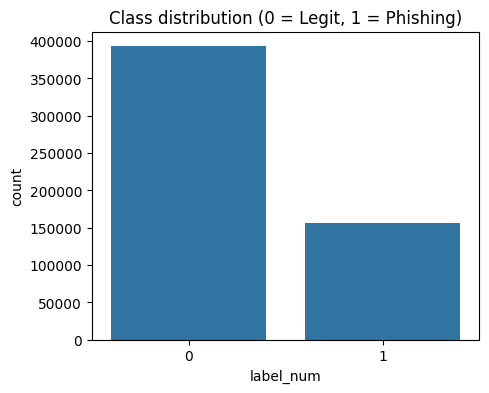

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x='label_num', data=df)
plt.title('Class distribution (0 = Legit, 1 = Phishing)')
plt.show()


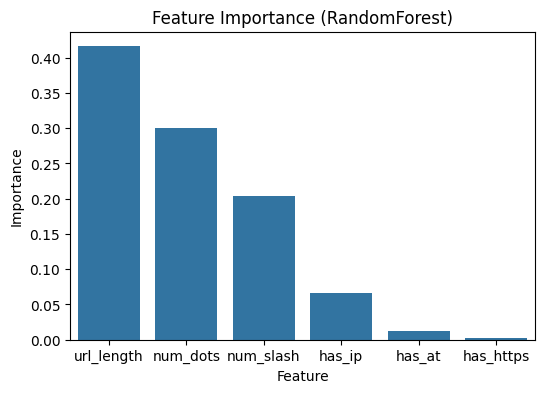

In [12]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
sns.barplot(x=[feature_cols[i] for i in indices],
            y=importances[indices])
plt.title('Feature Importance (RandomForest)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


In [ ]:
# Phishing Attack Simulation and Detection

## Objective – short text describing the project goal.

## Dataset – name, size (549,346 URLs, 2 columns URL + Label), source (Kaggle‑style phishing URL dataset).

## Feature Engineering – explain the six features you created from the URL string.

## Model and Evaluation – mention RandomForest, class_weight, accuracy and phishing recall values.

## Demo: Predicting a New URL – keep the extract_features_from_url and prediction code here.

In [13]:
import re
import numpy as np

def extract_features_from_url(url):
    url_length = len(url)
    num_dots = url.count('.')
    num_slash = url.count('/')
    has_https = int('https' in url.lower())
    has_at = int('@' in url)
    has_ip = int(bool(re.search(r'\d+\.\d+\.\d+\.\d+', url)))
    return np.array([url_length, num_dots, num_slash, has_https, has_at, has_ip]).reshape(1, -1)

def predict_url(url, model):
    features = extract_features_from_url(url)
    pred = model.predict(features)[0]
    proba = model.predict_proba(features)[0][1]  # probability of phishing
    if pred == 1:
        print(f"URL looks PHISHING with probability {proba:.2f}")
    else:
        print(f"URL looks LEGITIMATE with phishing probability {proba:.2f}")


In [14]:
test_url_1 = "http://login-secure-update.example.com/verify"
predict_url(test_url_1, rf)

test_url_2 = "https://www.google.com/"
predict_url(test_url_2, rf)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


URL looks LEGITIMATE with phishing probability 0.44


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


URL looks PHISHING with probability 0.71


In [15]:
import joblib

joblib.dump(rf, 'phishing_url_rf_model.pkl')
joblib.dump(feature_cols, 'phishing_url_features.pkl')
print("Model and feature list saved.")


Model and feature list saved.
